<a href="https://colab.research.google.com/github/FaustoJuarez/Machine-Learning-Journey/blob/main/RGBtoSeparatedBands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculating for our Area of Interest


In [2]:
!pip install rawpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.7 MB/s eta 0:00:00


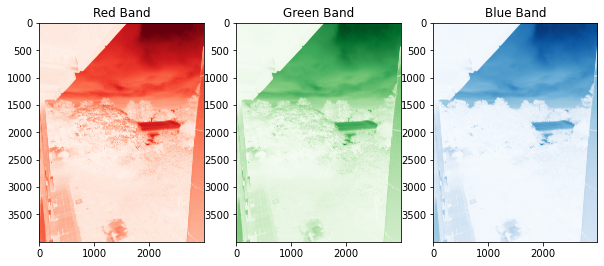

In [6]:
import rawpy
import numpy as np
import matplotlib.pyplot as plt

# Load the .dng image
with rawpy.imread("/content/quintaagro16-2-23-2.dng") as raw:
    # Get the raw RGB data
    rgb = raw.postprocess()

# Split the RGB data into separate bands
r = rgb[:, :, 0]
g = rgb[:, :, 1]
b = rgb[:, :, 2]

# Display the RGB bands using matplotlib
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
ax1.imshow(r, cmap='Reds')
ax1.set_title('Red Band')
ax2.imshow(g, cmap='Greens')
ax2.set_title('Green Band')
ax3.imshow(b, cmap='Blues')
ax3.set_title('Blue Band')
plt.show()


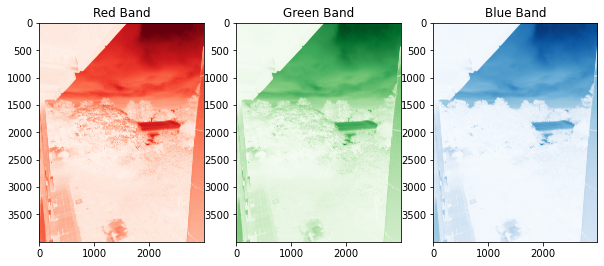

In [7]:
import rawpy
import numpy as np
import matplotlib.pyplot as plt

# Load the .dng image
with rawpy.imread("/content/quintaagro16-2-23-2.dng") as raw:
    # Get the raw RGB data
    rgb = raw.postprocess()

# Split the RGB data into separate bands
r = rgb[:, :, 0]
g = rgb[:, :, 1]
b = rgb[:, :, 2]

# Display the RGB bands using matplotlib
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
ax1.imshow(r, cmap='Reds')
ax1.set_title('Red Band')
ax2.imshow(g, cmap='Greens')
ax2.set_title('Green Band')
ax3.imshow(b, cmap='Blues')
ax3.set_title('Blue Band')
plt.show()


In [8]:
import rawpy
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [9]:
with rawpy.imread('/content/quintaagro16-2-23.dng-2') as raw:
    rgb = raw.postprocess()


LibRawTooBigError: ignored

In [10]:
r, g, b = cv2.split(rgb)


In [11]:
gli = (2 * g - r - b) / (2 * g + r + b + 0.01)
gli[np.isnan(gli) | np.isinf(gli)] = 0
gli_normalized = (gli - np.min(gli)) / (np.max(gli) - np.min(gli))


In [12]:
with rawpy.imread('/content/quintaagro16-2-23-2.dng') as raw:
    rgb = raw.postprocess()
r, g, b = cv2.split(rgb)

# Calculate the GLI index
denominator = (2 * g + r + b + 0.01)
gli = np.zeros_like(g)
valid_mask = denominator > 0
gli[valid_mask] = (2 * g[valid_mask] - r[valid_mask] - b[valid_mask]) / denominator[valid_mask]

# Print some debugging information
print("r:", r)
print("g:", g)
print("b:", b)
print("denominator:", denominator)
print("gli:", gli)
print("gli_normalized:", gli_normalized)

r: [[ 14  19  15 ... 235 234 234]
 [ 15  16  41 ... 236 235 235]
 [  7   5  28 ... 238 238 238]
 ...
 [120 121 121 ...  67  67  67]
 [119 121 122 ...  67  67  67]
 [119 121 121 ...  67  68  68]]
g: [[  4   6   5 ... 201 200 200]
 [  5   4   5 ... 202 201 201]
 [  1   0   6 ... 202 203 203]
 ...
 [ 95  95  96 ...  48  48  48]
 [ 94  95  96 ...  48  48  48]
 [ 94  95  95 ...  48  48  48]]
b: [[  5   6   4 ... 191 189 189]
 [  6   4   7 ... 192 190 190]
 [  2   1   7 ... 192 191 191]
 ...
 [ 75  76  76 ...  39  39  39]
 [ 75  76  76 ...  39  39  39]
 [ 75  76  76 ...  39  38  38]]
denominator: [[ 27.01  37.01  29.01 ...  60.01  55.01  55.01]
 [ 31.01  28.01  58.01 ...  64.01  59.01  59.01]
 [ 11.01   6.01  47.01 ...  66.01  67.01  67.01]
 ...
 [129.01 131.01 133.01 ... 202.01 202.01 202.01]
 [126.01 131.01 134.01 ... 202.01 202.01 202.01]
 [126.01 131.01 131.01 ... 202.01 202.01 202.01]]
gli: [[ 9  6  8 ...  3  4  4]
 [ 7  8  3 ...  3  3  3]
 [22 41  4 ...  3  3  3]
 ...
 [ 1  1  1 ...  1

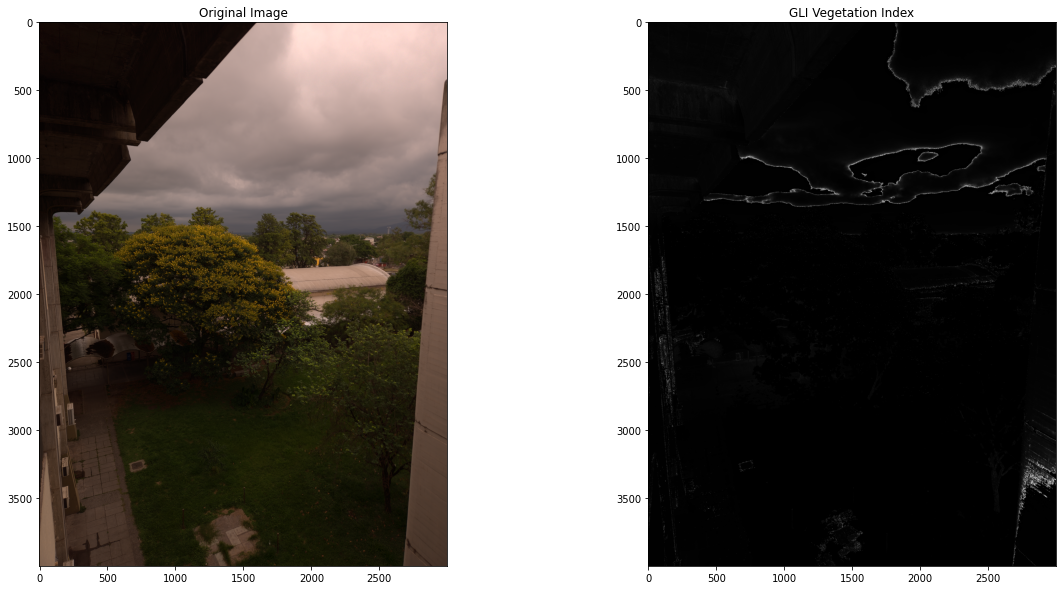

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(rgb)
ax[0].set_title('Original Image')
ax[1].imshow(gli, cmap='gray')
ax[1].set_title('GLI Vegetation Index')
plt.show()


In [ ]:
print(gli_normalized)

[[6.26525197e-05 6.40168962e-05 6.57706637e-05 ... 3.60422704e-06
  1.24843945e-03 1.24843945e-03]
 [6.16959684e-05 6.47128189e-05 6.40168962e-05 ... 3.60422704e-06
  7.92857936e-06 7.92857936e-06]
 [6.23542277e-05 6.40168962e-05 6.47128189e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.27276812e-04 1.66638894e-04 1.11384553e-04 ... 7.77936477e-07
  1.43970363e-04 1.43970363e-04]
 [1.03163141e-04 1.63993832e-04 2.03230309e-04 ... 2.19069008e-04
  1.43970363e-04 1.43970363e-04]
 [1.29612348e-04 1.13432033e-04 1.51266047e-04 ... 1.83681446e-04
  1.01968896e-04 1.01968896e-04]]


In [12]:
ax[1].imshow(gli_normalized, cmap='gray')
plt.draw()
plt.pause(0.001)


<Figure size 432x288 with 0 Axes>

Calculo VI Green

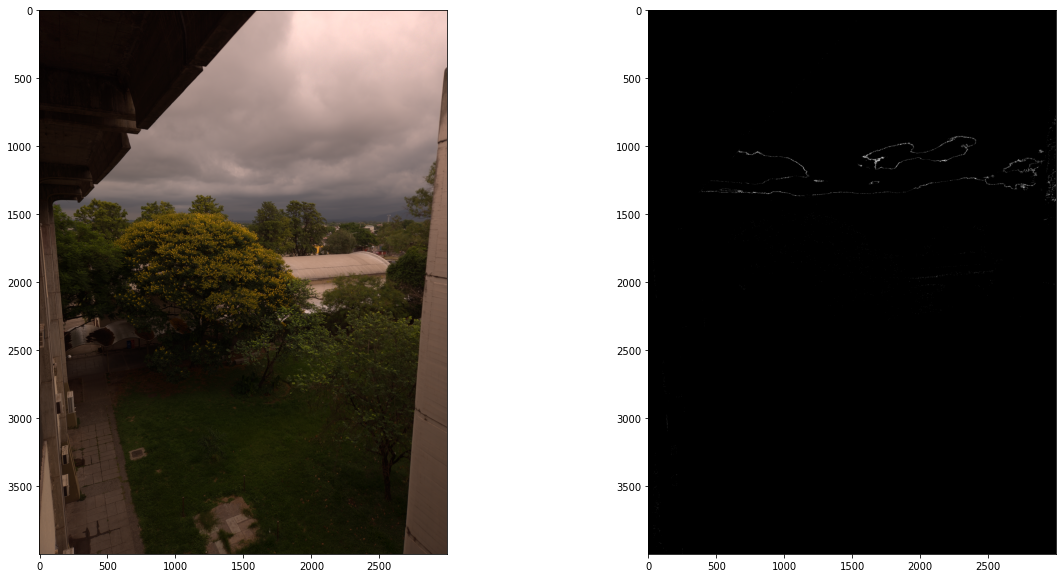

In [13]:
# Calculate the VIG
vig = (g - r) / (g + r + 0.01)

# Normalize the VIG to [0, 1] for display
vig_normalized = (vig - np.min(vig)) / (np.max(vig) - np.min(vig))

# Display the RGB image and the VIG
fig, ax = plt.subplots(1, 2,figsize=(20, 10))
ax[0].imshow(rgb)
ax[1].imshow(vig_normalized, cmap='gray')
plt.show()

Calculo MPRI

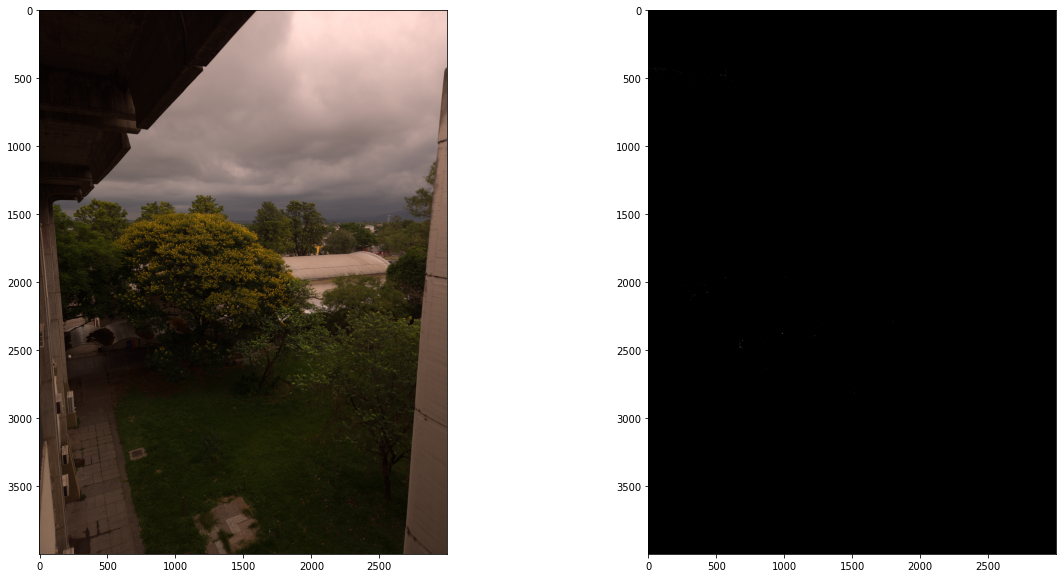

In [14]:
# Calculate the MPRI
Fm = np.max(g)
F = g.mean()
mpri = (Fm - g) / (g + 0.01)


# Normalize the MPRI to [0, 1] for display
mpri_normalized = (mpri - np.min(mpri)) / (np.max(mpri) - np.min(mpri))

# Display the RGB image and the MPRI
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(rgb)
ax[1].imshow(mpri_normalized, cmap='gray')
plt.show()

Calculating MGRVI


In [15]:
red_band = rgb[:, :, 0]
green_band = rgb[:, :, 1]


In [16]:
mgrvi = (green_band - red_band) / (green_band + red_band + 0.01)


In [17]:
mgrvi_normalized = (mgrvi - mgrvi.min()) / (mgrvi.max() - mgrvi.min() + 0.01)


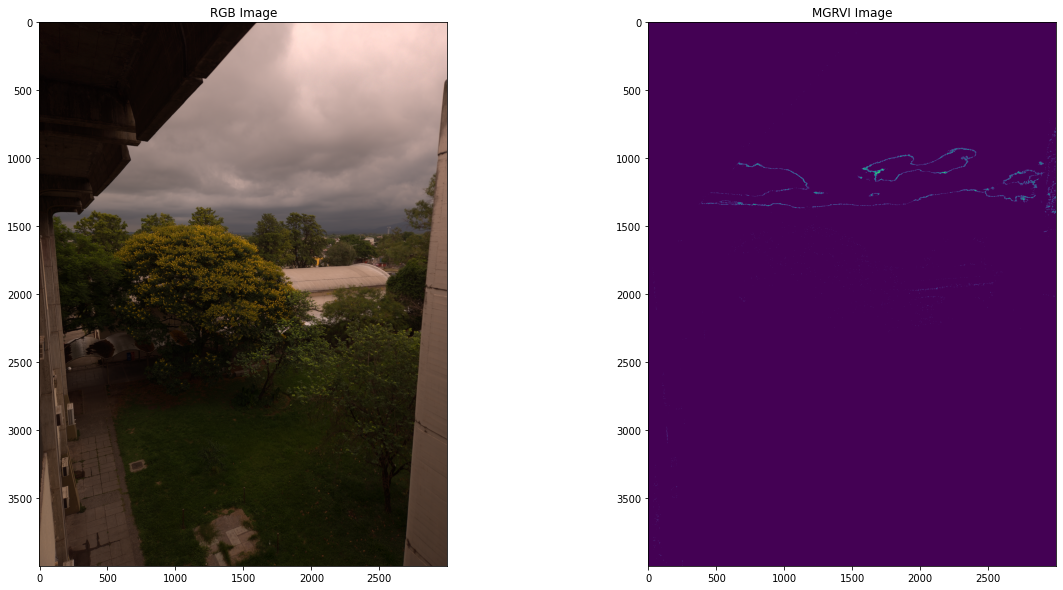

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(rgb)
ax[0].set_title('RGB Image')
ax[1].imshow(mgrvi_normalized, cmap='viridis')
ax[1].set_title('MGRVI Image')
plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 as cv
%matplotlib inline 

In [22]:
image =img.imread("/content/quintaagro16-2-23-2.jpg")

In [23]:
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)#converting to HSV image
#masking is done in the following format
green_mask = cv.inRange(hsv, (36, 25, 25), (86, 255,255))

brown_mask = cv.inRange(hsv, (74, 74, 74), (255,255,255))

grey_mask = cv.inRange(hsv, (0, 10, 00), (180, 30, 255))

white_mask = cv.inRange(hsv, (0,0,168), (172,111,255))

Text(0.5, 1.0, 'Total Developed')

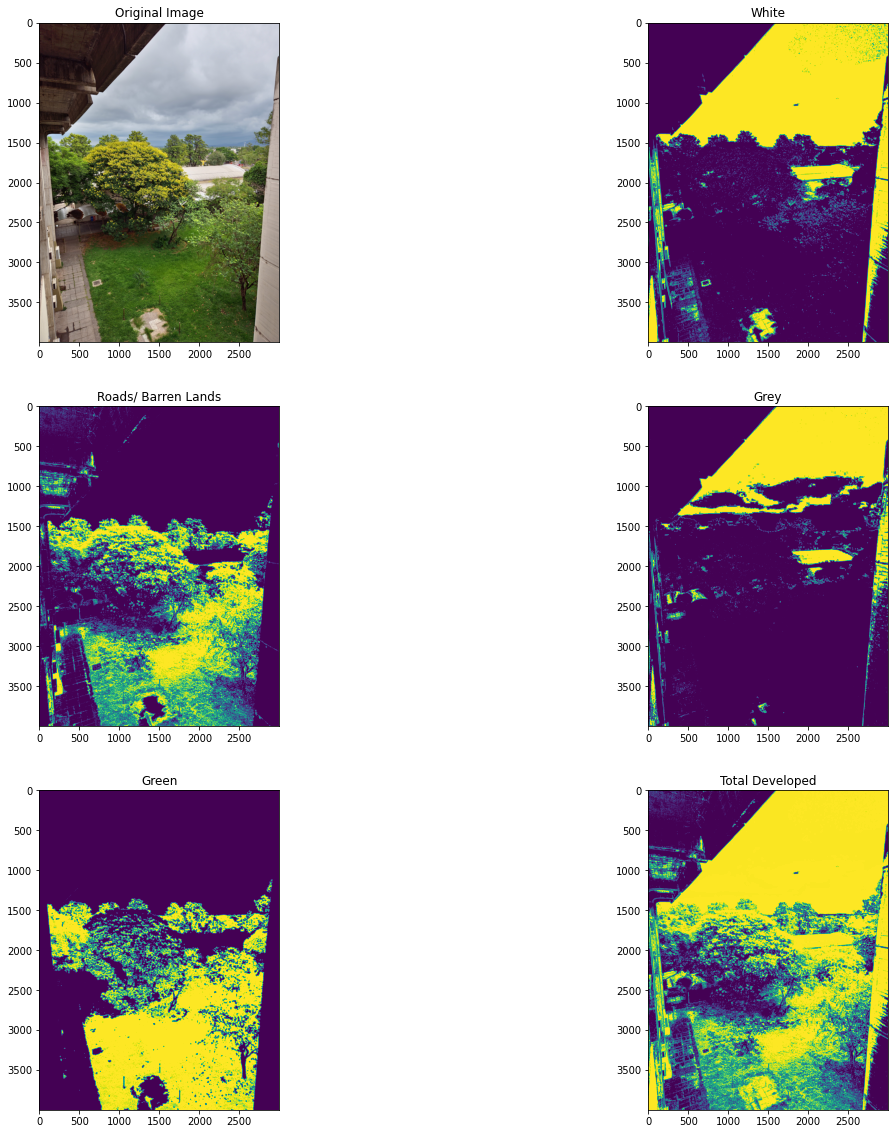

In [28]:
plt.figure(figsize=(20 , 20))

plt.subplot(3,2,1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(3,2,5)
plt.imshow(green_mask)
plt.title("Green")

plt.subplot(3,2,3)
plt.imshow(brown_mask)
plt.title("Roads/ Barren Lands")

plt.subplot(3,2,4)
plt.imshow(grey_mask)
plt.title("Grey")

plt.subplot(3,2,2)
plt.imshow(white_mask)
plt.title("White")

plt.subplot(3,2,6)
plt.imshow(grey_mask+brown_mask+white_mask)
plt.title("Total Developed")

In [29]:
percentage = lambda mask: round(((mask > 0).mean()) * 100,3)
roads_barrenlands = percentage(brown_mask)
greenery = percentage(green_mask)
constructions = percentage(grey_mask) + percentage(white_mask)

print("Greenery % - ", greenery," \nRoads/Barren Land % - ",roads_barrenlands," \nConstructions % - ",constructions)

Greenery % -  32.835  
Roads/Barren Land % -  27.82  
Constructions % -  54.352999999999994


**Calculating RAVI index**

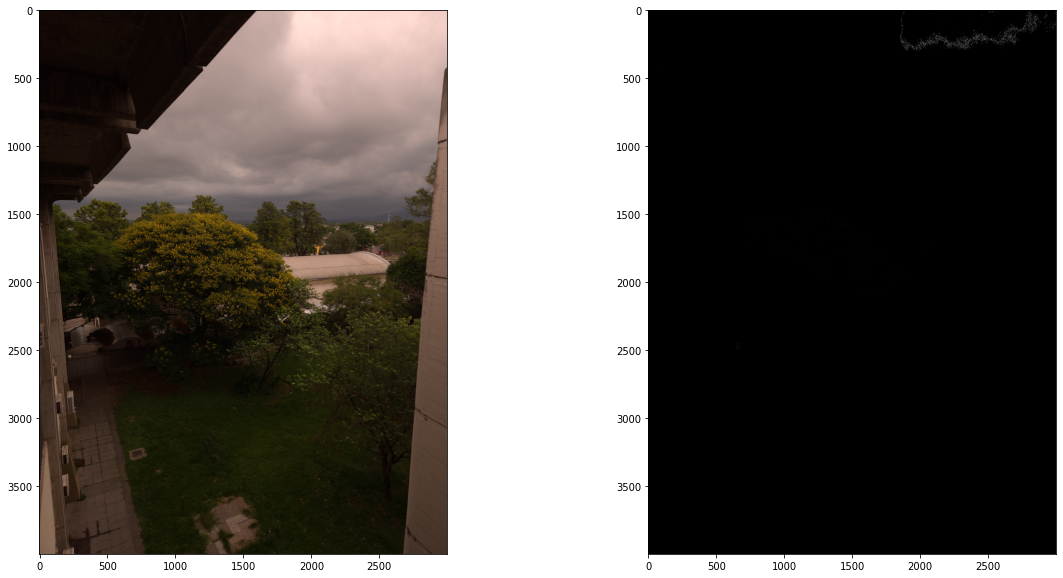

In [17]:
# Calculate the RAVI
vari = (g - r) / (g + r - b + 0.001)

# Display the RGB image and the VIG
fig, ax = plt.subplots(1, 2,figsize=(20, 10))
ax[0].imshow(rgb)
ax[1].imshow(vari, cmap='gray')
plt.show()

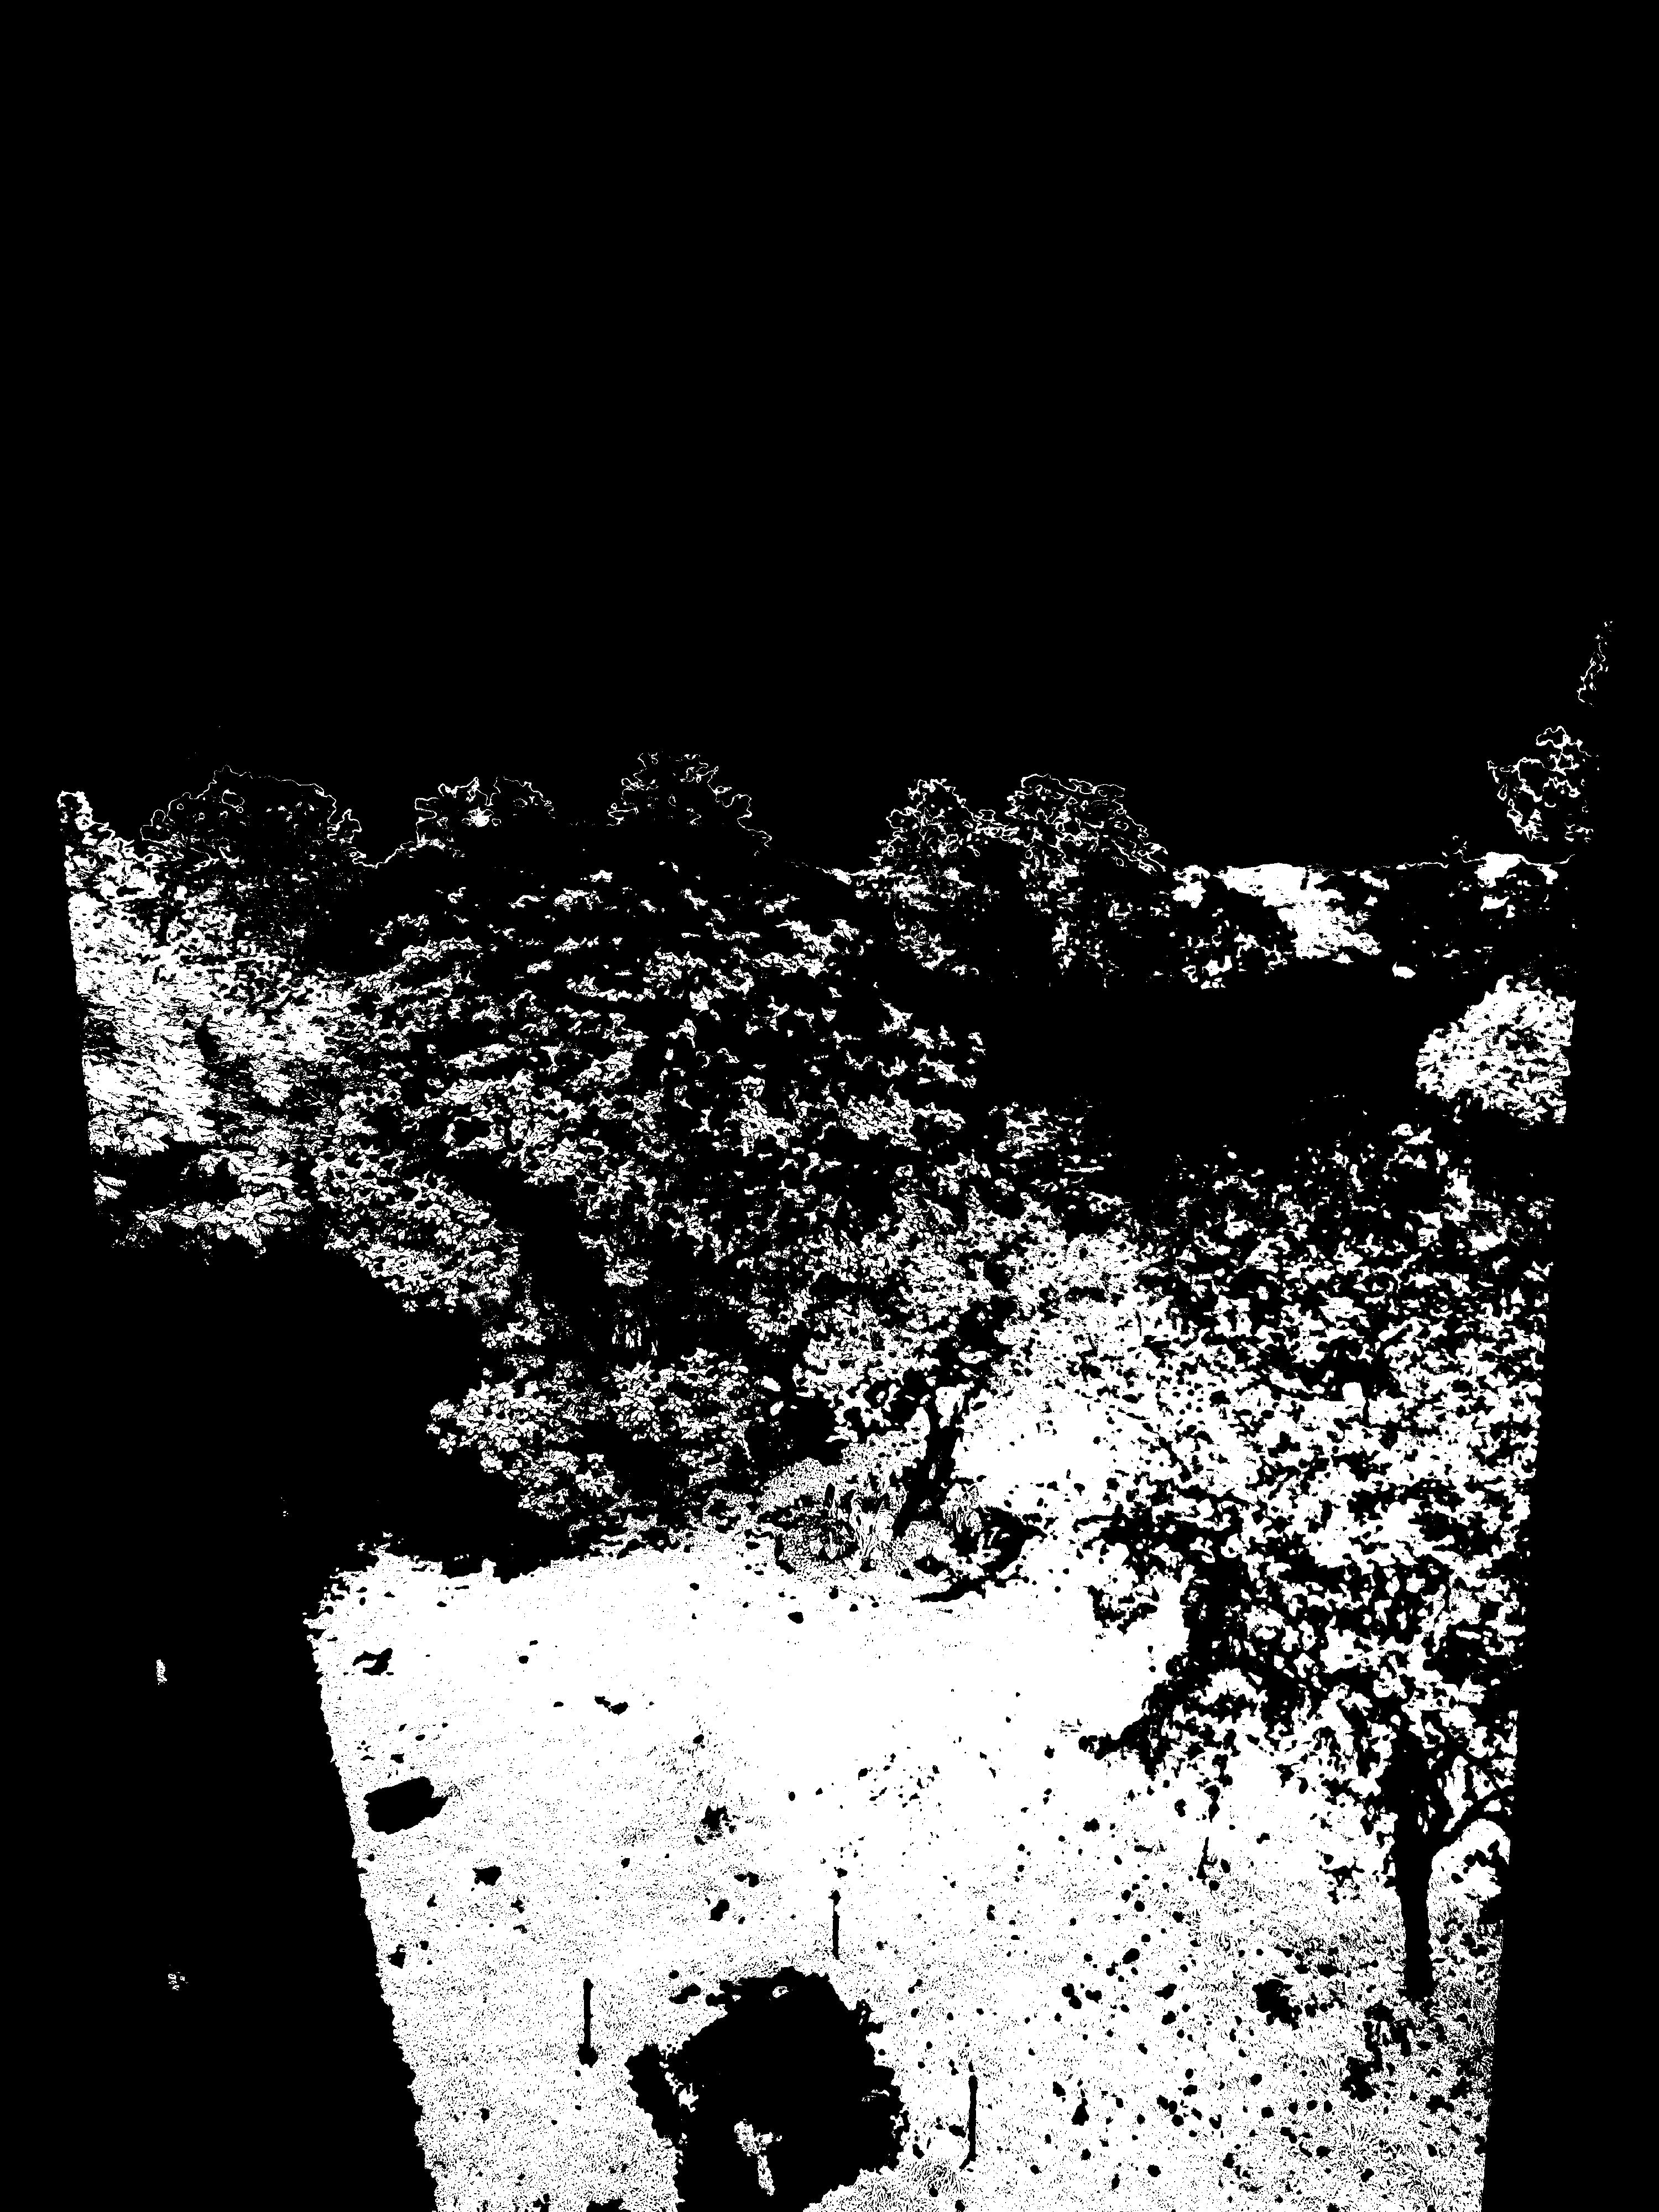

-1

In [21]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# load RGB image
img = cv2.imread('/content/quintaagro16-2-23-2.jpg')

# convert to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define lower and upper threshold values for green channel
lower_green = np.array([40, 40, 40])
upper_green = np.array([70, 255, 255])

# apply thresholding to extract green channel
mask = cv2.inRange(hsv, lower_green, upper_green)

# show the resulting mask image
cv2_imshow(mask)
cv2.waitKey(0)

In [23]:
import rawpy
import numpy as np

with rawpy.imread("/content/quintaagro16-2-23-2.dng") as raw:
    img = raw.postprocess()


In [24]:
import cv2

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [25]:
green = img[:, :, 1]
red = img[:, :, 0]


In [27]:
gndvi = (green - red) / (green + red + 0.001)


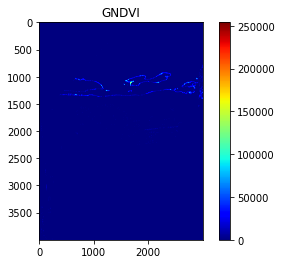

In [28]:
import matplotlib.pyplot as plt

plt.imshow(gndvi, cmap='jet')
plt.colorbar()
plt.title('GNDVI')

plt.show()


In [1]:
pip install opencv-python matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2

img = cv2.imread('/content/ZonasVerdes-QuintaAgro.png')


In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [6]:
g = img[:, :, 1]
r = img[:, :, 2]
gndvi = (g - r) / (g + r + 0.001)


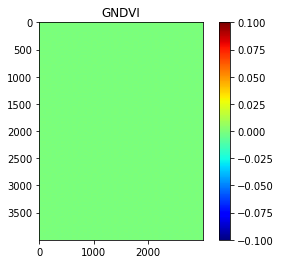

In [7]:
import matplotlib.pyplot as plt

plt.imshow(gndvi, cmap='jet')
plt.colorbar()
plt.title('GNDVI')

plt.show()